In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import pickle

In [5]:
balanced_data = pd.read_csv("balanced_data.csv")
synthetic_data = pd.read_csv("synthetic_data.csv")
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")
all_data = pd.read_csv("all_data.csv")

In [10]:
balanced_data.head()

,Location,Date,Sentinel-2,Longitude,Latitude,B1,B2,B3,B4,B5,...,GNDVI,MCARI,MSI,NDMI,NBR,NDSI,SAVI,OSI,PNDVI,label
0,Caribbean Sea,20161103,A,-86.422592,15.947693,0.022240,0.024286,0.022068,0.016566,0.012177,...,-0.261005,-0.002935,1.042256,-0.020691,0.007203,0.241619,-0.010295,1.590786,-0.659011,1
1,Gulf of Gera,20210626,B,26.528152,39.040215,0.016377,0.024589,0.036882,0.013402,0.011666,...,-0.226979,0.002654,1.103045,-0.048998,0.209766,0.179982,0.027489,2.044950,-0.526318,1
2,Gulf of Gera,20210626,B,26.522369,39.041180,0.015475,0.020442,0.020078,0.003485,0.001777,...,-0.227117,0.000157,0.505766,0.328228,0.332796,0.516818,0.026622,1.152688,-0.553553,1
3,Gulf of Gera,20210626,B,26.521099,39.041176,0.015464,0.023483,0.018375,0.002875,0.001410,...,-0.247050,0.000198,0.484931,0.346864,0.338666,0.547037,0.023987,0.904912,-0.602547,1
4,Gulf of Gera,20210626,B,26.525602,39.041553,0.013649,0.017143,0.019180,0.002774,0.001669,...,-0.161507,0.001002,0.543585,0.295685,0.316972,0.436354,0.032148,1.280645,-0.476946,1


In [11]:
balanced_data["data"] = "balanced"
synthetic_data["data"] = "synthetic"
test_data["data"] = "test"
train_data["data"] = "train"
all_data["data"] = "all"

In [13]:
# Define the required features
required_features = ['NDSI', 'MNDWI', 'NDWI', 'OSI', 'FDI', 'B1', 'data']

# Select the required features from each dataset
balanced_data = balanced_data[required_features]
synthetic_data = synthetic_data[required_features]
test_data = test_data[required_features]
train_data = train_data[required_features]
all_data = all_data[required_features]

In [14]:
# Stack all datasets into one DataFrame
all_floating_debris_data = pd.concat([balanced_data, synthetic_data, test_data, train_data, all_data], ignore_index=True)


In [15]:
all_floating_debris_data

,NDSI,MNDWI,NDWI,OSI,FDI,B1,data
0,0.241619,0.317943,0.261005,1.590786,-0.001733,0.022240,balanced
1,0.179982,0.759393,0.226979,2.044950,-0.007453,0.016377,balanced
2,0.516818,1.400542,0.227117,1.152688,0.010569,0.015475,balanced
3,0.547037,1.543019,0.247050,0.904912,0.010634,0.015464,balanced
4,0.436354,1.205300,0.161507,1.280645,0.010418,0.013649,balanced
...,...,...,...,...,...,...,...
472630,0.545917,0.669935,0.115151,1.567247,0.021868,0.021488,all
472631,0.551830,0.812356,0.121711,1.519643,0.015500,0.021999,all
472632,0.495376,0.668826,0.252278,1.778986,0.010866,0.022414,all
472633,0.666688,0.831938,0.211998,1.979250,0.039799,0.044451,all


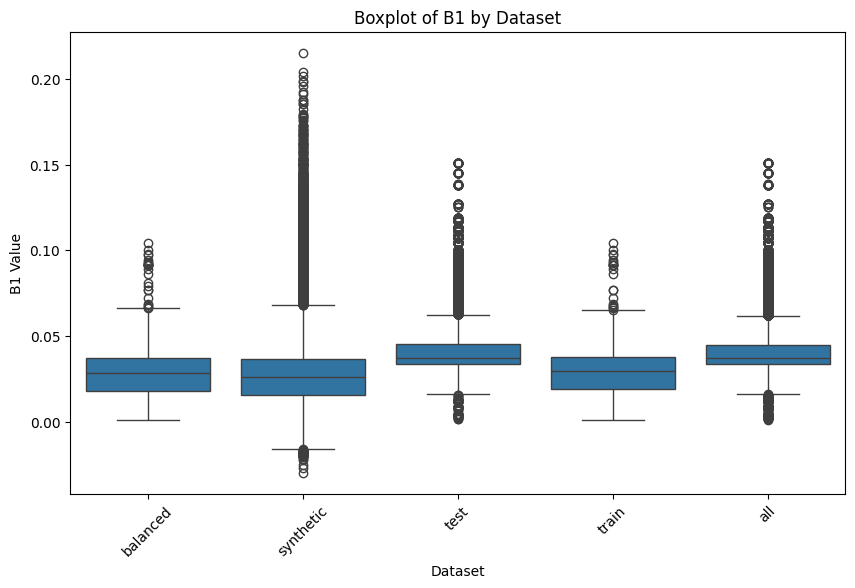

In [17]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_floating_debris_data, x="data", y="B1")

# Set labels and title
plt.xlabel("Dataset")
plt.ylabel("B1 Value")
plt.title("Boxplot of B1 by Dataset")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

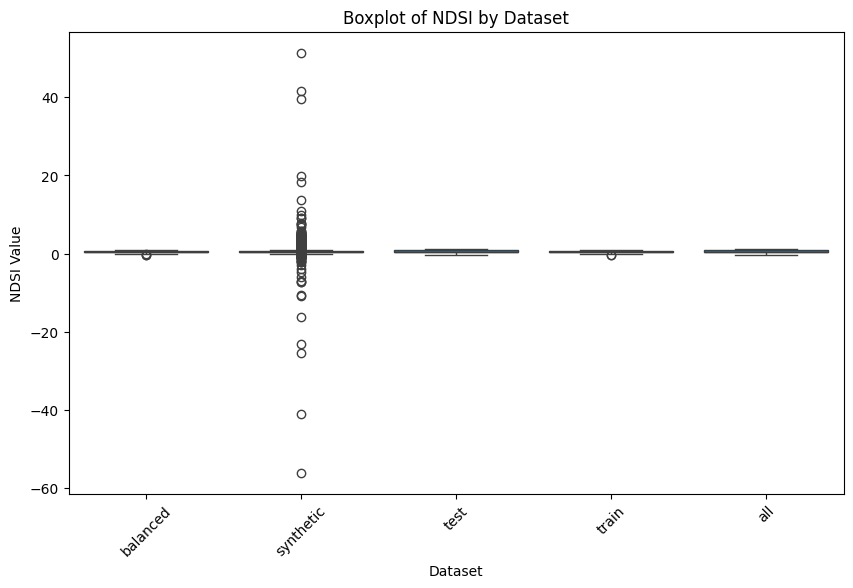

In [27]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_floating_debris_data, x="data", y="NDSI")

# Set labels and title
plt.xlabel("Dataset")
plt.ylabel("NDSI Value")
plt.title("Boxplot of NDSI by Dataset")


# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

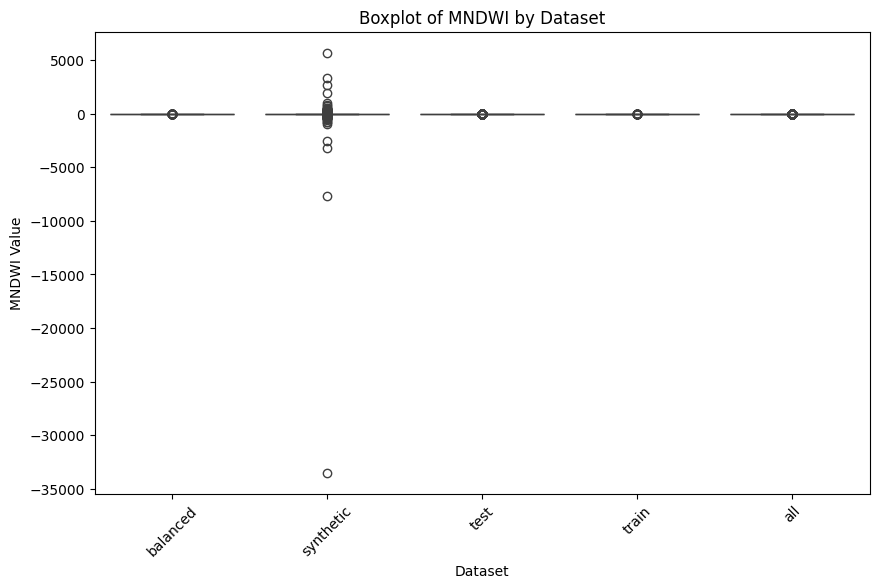

In [19]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_floating_debris_data, x="data", y="MNDWI")

# Set labels and title
plt.xlabel("Dataset")
plt.ylabel("MNDWI Value")
plt.title("Boxplot of MNDWI by Dataset")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

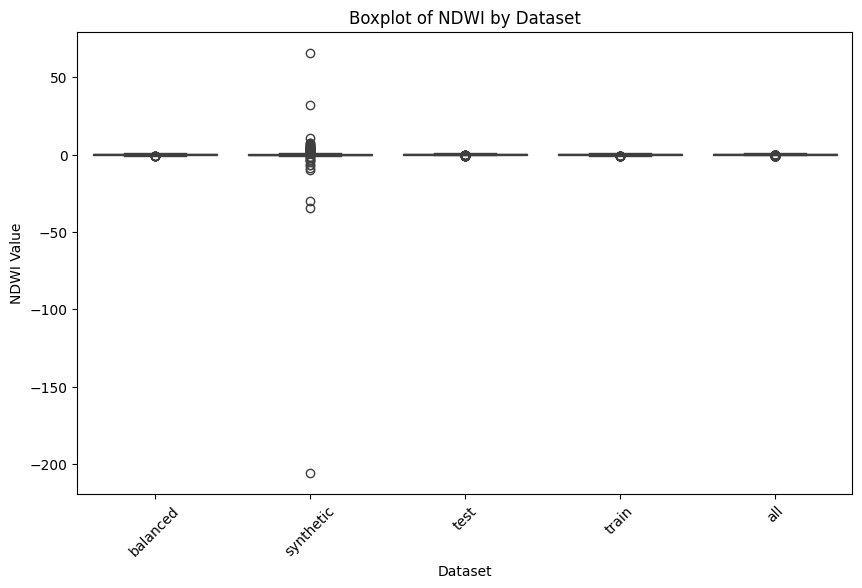

In [20]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_floating_debris_data, x="data", y="NDWI")

# Set labels and title
plt.xlabel("Dataset")
plt.ylabel("NDWI Value")
plt.title("Boxplot of NDWI by Dataset")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

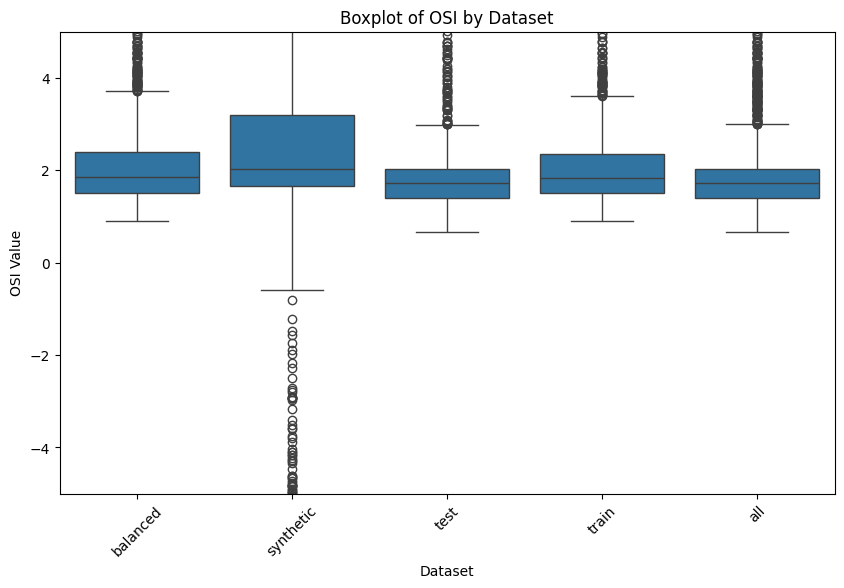

In [28]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_floating_debris_data, x="data", y="OSI")

# Set labels and title
plt.xlabel("Dataset")
plt.ylabel("OSI Value")
plt.title("Boxplot of OSI by Dataset")
plt.ylim(-5,5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

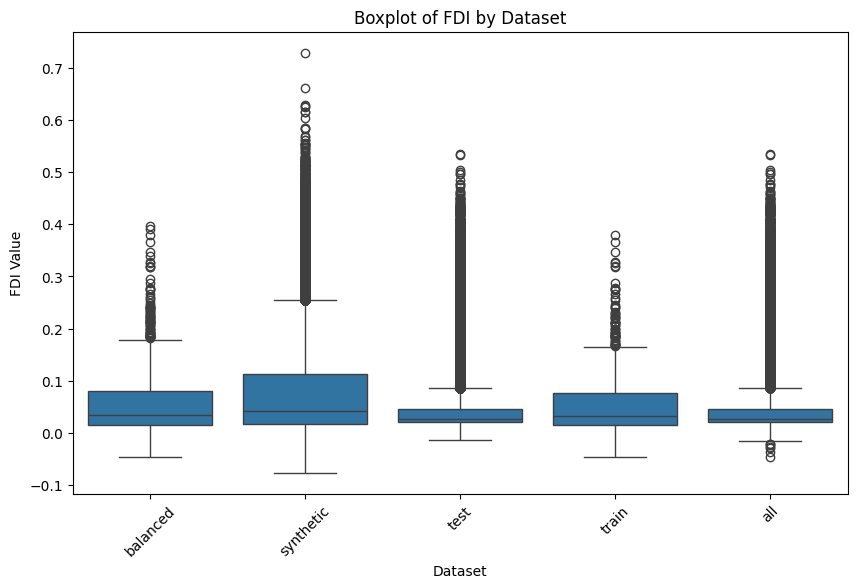

In [22]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_floating_debris_data, x="data", y="FDI")

# Set labels and title
plt.xlabel("Dataset")
plt.ylabel("FDI Value")
plt.title("Boxplot of FDI by Dataset")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()